<a href="https://colab.research.google.com/github/sivaprakashkoka/Urban-Airpollution-Challenge/blob/main/Capstone_Model_Training%2C_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("completed_train.csv")

In [ ]:
data.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_CLOUD_cloud_top_pressure,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,Month
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,72204.276756,0.252417,-1.231330,840209.874619,-0.000127,0.312521,-0.000040,-1.861476,0.000000,1
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,99353.672374,0.315403,-1.082553,840772.941995,0.000150,0.433957,0.000050,-1.452612,0.059433,1
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,95671.383578,0.307463,-1.001241,841410.713456,0.000150,0.356925,0.000053,-1.572950,0.082063,1
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,96232.486418,0.279637,-0.777023,841103.242368,0.000227,0.584522,0.000110,-1.239317,0.121261,1
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,52561.523079,0.238241,0.366324,840763.055499,0.000390,0.408047,0.000159,0.202489,0.037919,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30554 entries, 0 to 30553
Data columns (total 47 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30554 non-null  object 
 1   Date                                                 30554 non-null  object 
 2   Place_ID                                             30554 non-null  object 
 3   target                                               30554 non-null  float64
 4   target_min                                           30554 non-null  float64
 5   target_max                                           30554 non-null  float64
 6   target_variance                                      30554 non-null  float64
 7   target_count                                         30554 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30554 non-nul

In [ ]:
y = data['target']
X = data.drop(['target', 'Place_ID X Date', 'Date', 'Place_ID'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5)

In [ ]:
y_pred = rf.predict(X_test)

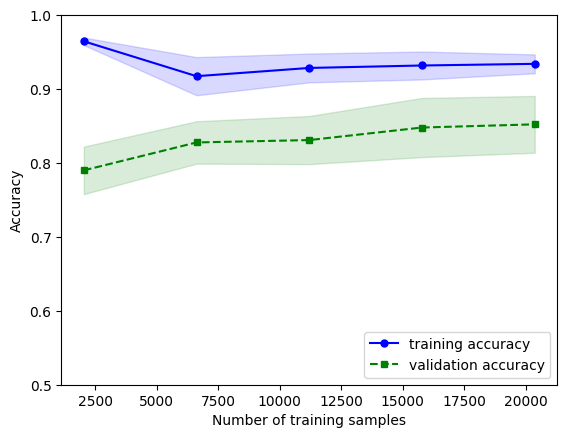

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=3, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

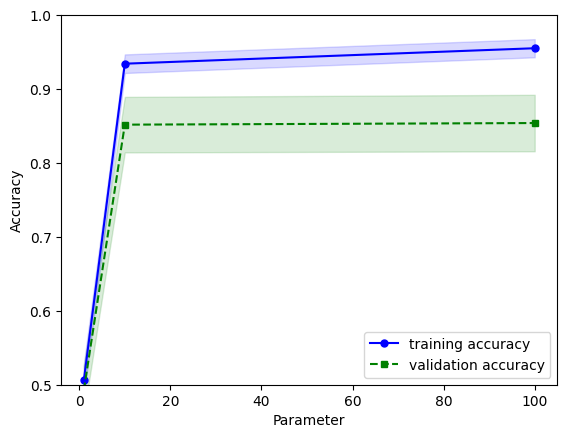

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1, 10, 100]
train_scores, test_scores = validation_curve(rf, X, y, param_name='max_depth', param_range=param_range, cv=3)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

In [ ]:
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('R-squared:', r2_score(y_test, y_pred))

Root Mean Squared Error: 16.23715476734628
R-squared: 0.882105818224973


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(best_params)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'max_depth': 47, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 135}
